### Instalador de los modulos: mysql-connector-python

In [5]:
!pip install mysql-connector-python

You should consider upgrading via the 'C:\Users\eddel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


### Importación de los modulos necesario

In [7]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

### Conectar a la base de datos

In [8]:
def connect_to_db():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="123456",
        database="matriculas"
    )

### Realizar una consulta y devolver los datos en un DataFrame de pandas

In [9]:
def fetch_data(query):
    connection = connect_to_db()
    cursor = connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(data, columns=columns)
    cursor.close()
    connection.close()
    return df

### Imprimir los datos en forma de tabla

In [10]:
def print_table(df):
    print(tabulate(df, headers='keys', tablefmt='psql'))

### Imprimir tabla con todos los datos

In [11]:
query = "SELECT * FROM matriculas"
df = fetch_data(query)
print_table(df)

+----+---------------------------------+---------+--------------+------------+--------------+------------------+------------+
|    | Entidad                         | Sexo    |   Preescolar |   Primaria |   Secundaria |   Media superior |   Superior |
|----+---------------------------------+---------+--------------+------------+--------------+------------------+------------|
|  0 | Estados Unidos Mexicanos        | Total   |      4334938 |   13345969 |      6210924 |          5003087 |    4032931 |
|  1 | Estados Unidos Mexicanos        | Hombres |      2179034 |    6779902 |      3119827 |          2420910 |    1901523 |
|  2 | Estados Unidos Mexicanos        | Mujeres |      2155904 |    6566067 |      3091097 |          2582177 |    2131408 |
|  3 | Aguascalientes                  | Total   |        53244 |     160072 |        73707 |            56980 |      54196 |
|  4 | Aguascalientes                  | Hombres |        26746 |      81207 |        37116 |            27212 |      

### Gráficas de todos los datos por sexo

In [15]:
def plot_df(sexo,nivel):
    query = "SELECT * FROM matriculas WHERE Sexo = "+'"' + sexo + '"'
    df_sex = fetch_data(query)
    print_table(df_sex)
    
    x = list(df_sex['Entidad'])
    y = list(df_sex[nivel])

    with plt.style.context(('ggplot')):
        plt.figure(figsize=(16, 8))    
    plt.bar(x[1:],y[1:])  
    if sexo == 'Total':
        plt.title('Alumnos matriculados en nivel '+nivel+' durante el periodo 2022/2023')
    else:
        plt.title('Alumnos sel sexo '+sexo+' matriculados en nivel '+nivel+' durante el periodo 2022/2023')
    plt.xticks(rotation=90)
    plt.ylabel('Estudiantes matriculados')
    plt.show()

### Ejemplos de gráficas

+----+---------------------------------+--------+--------------+------------+--------------+------------------+------------+
|    | Entidad                         | Sexo   |   Preescolar |   Primaria |   Secundaria |   Media superior |   Superior |
|----+---------------------------------+--------+--------------+------------+--------------+------------------+------------|
|  0 | Estados Unidos Mexicanos        | Total  |      4334938 |   13345969 |      6210924 |          5003087 |    4032931 |
|  1 | Aguascalientes                  | Total  |        53244 |     160072 |        73707 |            56980 |      54196 |
|  2 | Baja California                 | Total  |        97576 |     379695 |       183627 |           148054 |     128620 |
|  3 | Baja California Sur             | Total  |        25080 |      82593 |        40939 |            33423 |      22590 |
|  4 | Campeche                        | Total  |        32886 |      98212 |        44702 |            36452 |      29520 |


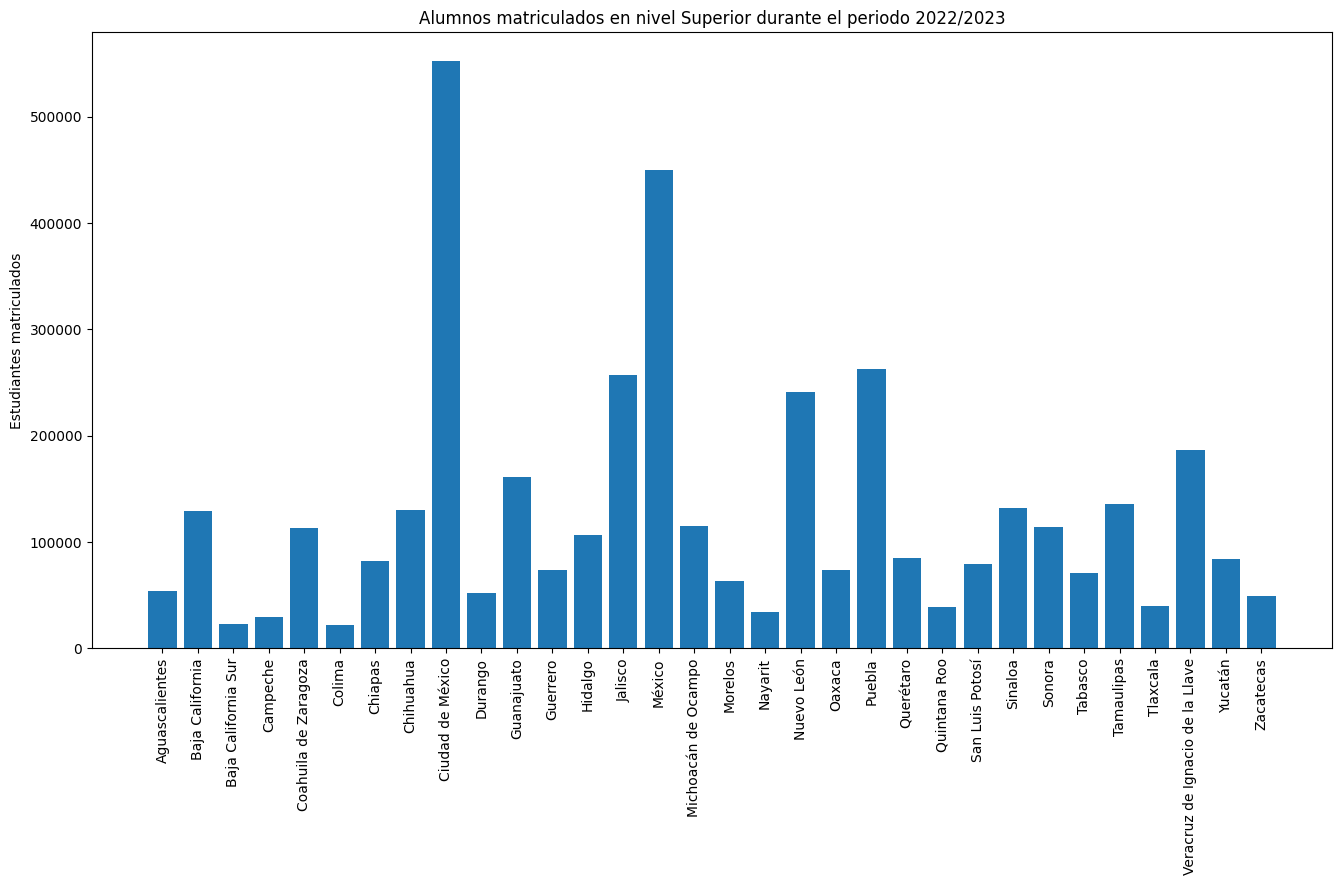

In [16]:
plot_df('Total','Superior')

+----+---------------------------------+---------+--------------+------------+--------------+------------------+------------+
|    | Entidad                         | Sexo    |   Preescolar |   Primaria |   Secundaria |   Media superior |   Superior |
|----+---------------------------------+---------+--------------+------------+--------------+------------------+------------|
|  0 | Estados Unidos Mexicanos        | Hombres |      2179034 |    6779902 |      3119827 |          2420910 |    1901523 |
|  1 | Aguascalientes                  | Hombres |        26746 |      81207 |        37116 |            27212 |      24983 |
|  2 | Baja California                 | Hombres |        48130 |     192749 |        92195 |            71558 |      60688 |
|  3 | Baja California Sur             | Hombres |        12390 |      42020 |        20684 |            16206 |      10456 |
|  4 | Campeche                        | Hombres |        16637 |      49867 |        22790 |            18329 |      

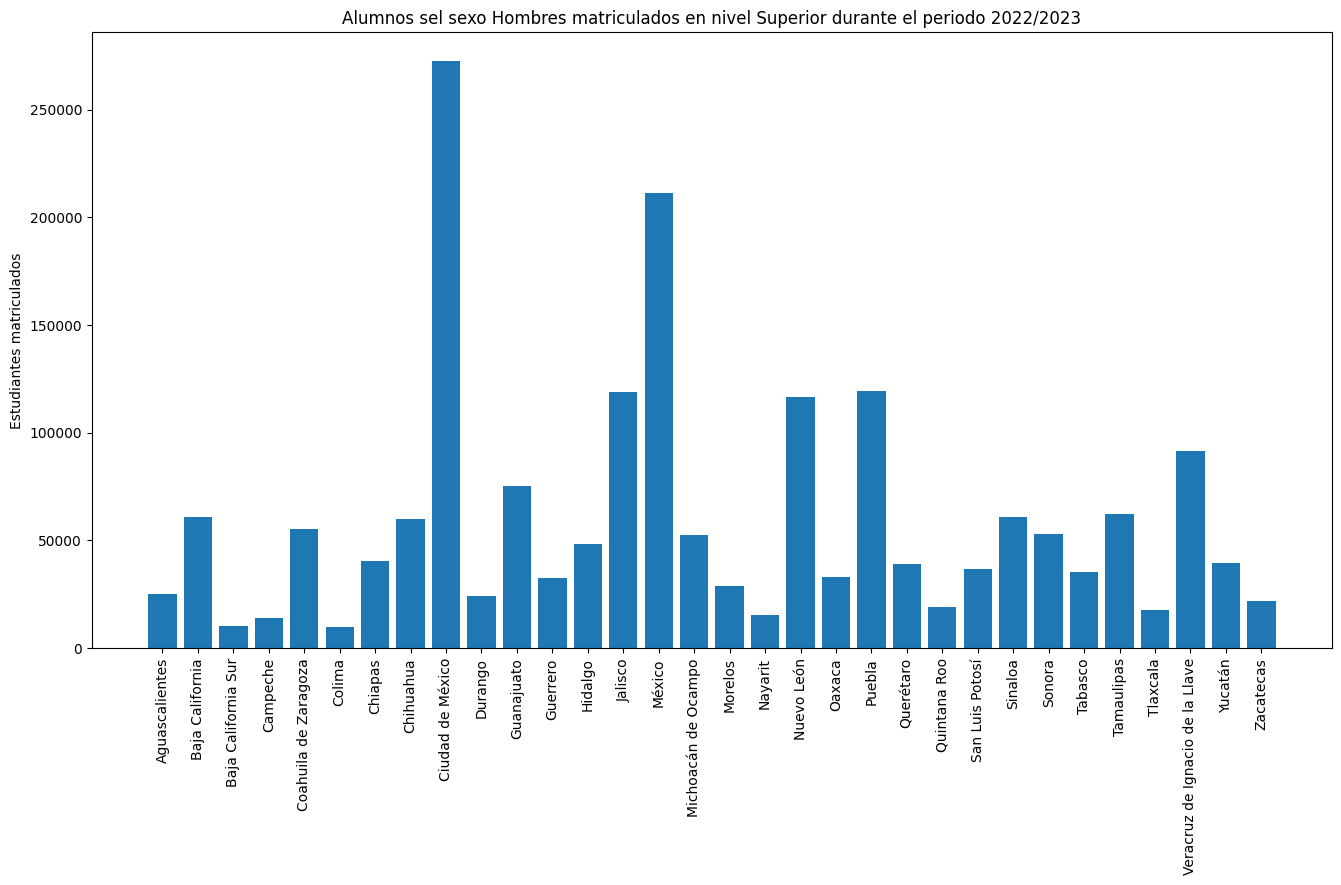

In [17]:
plot_df('Hombres','Superior')

+----+---------------------------------+---------+--------------+------------+--------------+------------------+------------+
|    | Entidad                         | Sexo    |   Preescolar |   Primaria |   Secundaria |   Media superior |   Superior |
|----+---------------------------------+---------+--------------+------------+--------------+------------------+------------|
|  0 | Estados Unidos Mexicanos        | Mujeres |      2155904 |    6566067 |      3091097 |          2582177 |    2131408 |
|  1 | Aguascalientes                  | Mujeres |        26498 |      78865 |        36591 |            29768 |      29213 |
|  2 | Baja California                 | Mujeres |        49446 |     186946 |        91432 |            76496 |      67932 |
|  3 | Baja California Sur             | Mujeres |        12690 |      40573 |        20255 |            17217 |      12134 |
|  4 | Campeche                        | Mujeres |        16249 |      48345 |        21912 |            18123 |      

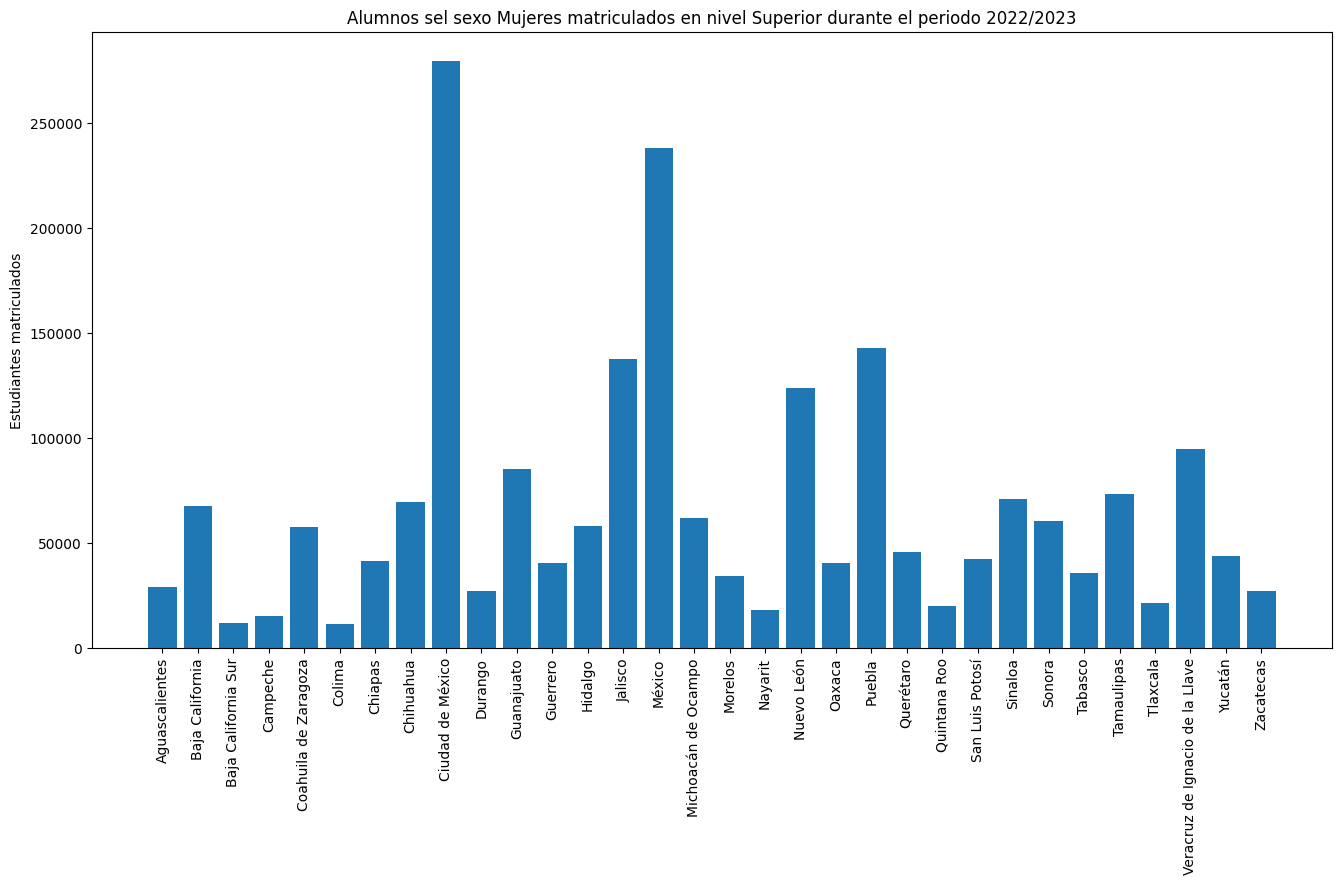

In [18]:
plot_df('Mujeres','Superior')

### Grafica de los datos por estado

In [20]:
def plot_df_state(estado):
    query = "SELECT * FROM matriculas WHERE entidad = " + '"' + estado + '"'
    df_state = fetch_data(query)
    print_table(df_state)

    df_sex_t = df_state.loc[df_state.Sexo == 'Total']
    df_sex_h = df_state.loc[df_state.Sexo == 'Hombres']    
    df_sex_m = df_state.loc[df_state.Sexo == 'Mujeres']

    x = ['Preescolar','Primaria','Secundaria','Media superior','Superior']
    x_axis = np.arange(len(x))
    
    yt = np.zeros(len(x))
    yh = np.zeros(len(x))
    ym = np.zeros(len(x))
    for i in range(len(x)):
        yt[i] = df_sex_t.loc[0][i+2]
        yh[i] = df_sex_h.loc[1][i+2]
        ym[i] = df_sex_m.loc[2][i+2]

    with plt.style.context(('ggplot')):
        plt.figure(figsize=(16, 8))
    plt.bar(x_axis-0.0,ym,0.2, label = 'Mujeres')
    plt.bar(x_axis-0.2,yh,0.2, label = 'Hombres')
    plt.bar(x_axis+0.2,yt,0.2, label = 'Total')    
    plt.title('Alumnos matriculados en '+estado+' durante el periodo 2022/2023')
    plt.ylabel('Estudiantes matriculados') 
    plt.xticks(x_axis, x)
    plt.legend() 
    plt.show()

### Ejemplo de gráficas por estado

+----+-----------+---------+--------------+------------+--------------+------------------+------------+
|    | Entidad   | Sexo    |   Preescolar |   Primaria |   Secundaria |   Media superior |   Superior |
|----+-----------+---------+--------------+------------+--------------+------------------+------------|
|  0 | Sonora    | Total   |        86191 |     293322 |       145723 |           118269 |     113588 |
|  1 | Sonora    | Hombres |        43293 |     149662 |        73569 |            57799 |      52815 |
|  2 | Sonora    | Mujeres |        42898 |     143660 |        72154 |            60470 |      60773 |
+----+-----------+---------+--------------+------------+--------------+------------------+------------+


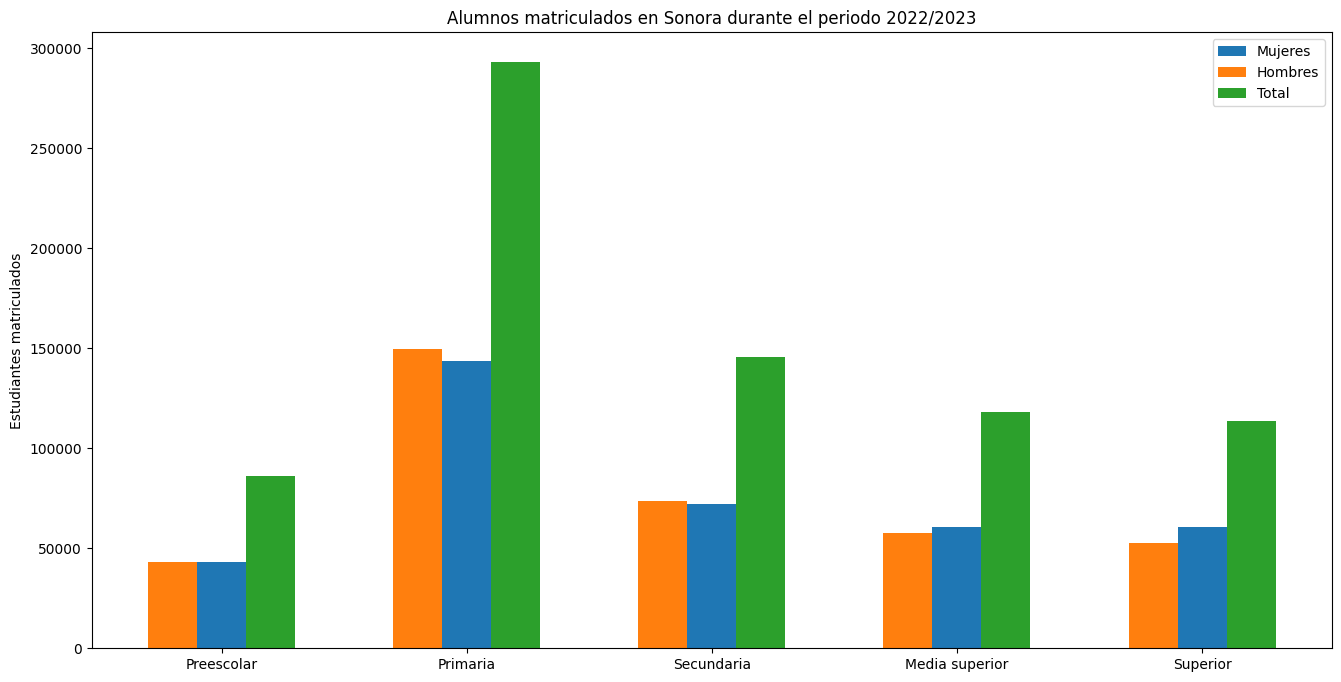

In [21]:
estado = 'Sonora'
plot_df_state(estado)

+----+-----------+---------+--------------+------------+--------------+------------------+------------+
|    | Entidad   | Sexo    |   Preescolar |   Primaria |   Secundaria |   Media superior |   Superior |
|----+-----------+---------+--------------+------------+--------------+------------------+------------|
|  0 | Sinaloa   | Total   |       110424 |     306849 |       151392 |           138451 |     131685 |
|  1 | Sinaloa   | Hombres |        56186 |     156718 |        76545 |            66919 |      60802 |
|  2 | Sinaloa   | Mujeres |        54238 |     150131 |        74847 |            71532 |      70883 |
+----+-----------+---------+--------------+------------+--------------+------------------+------------+


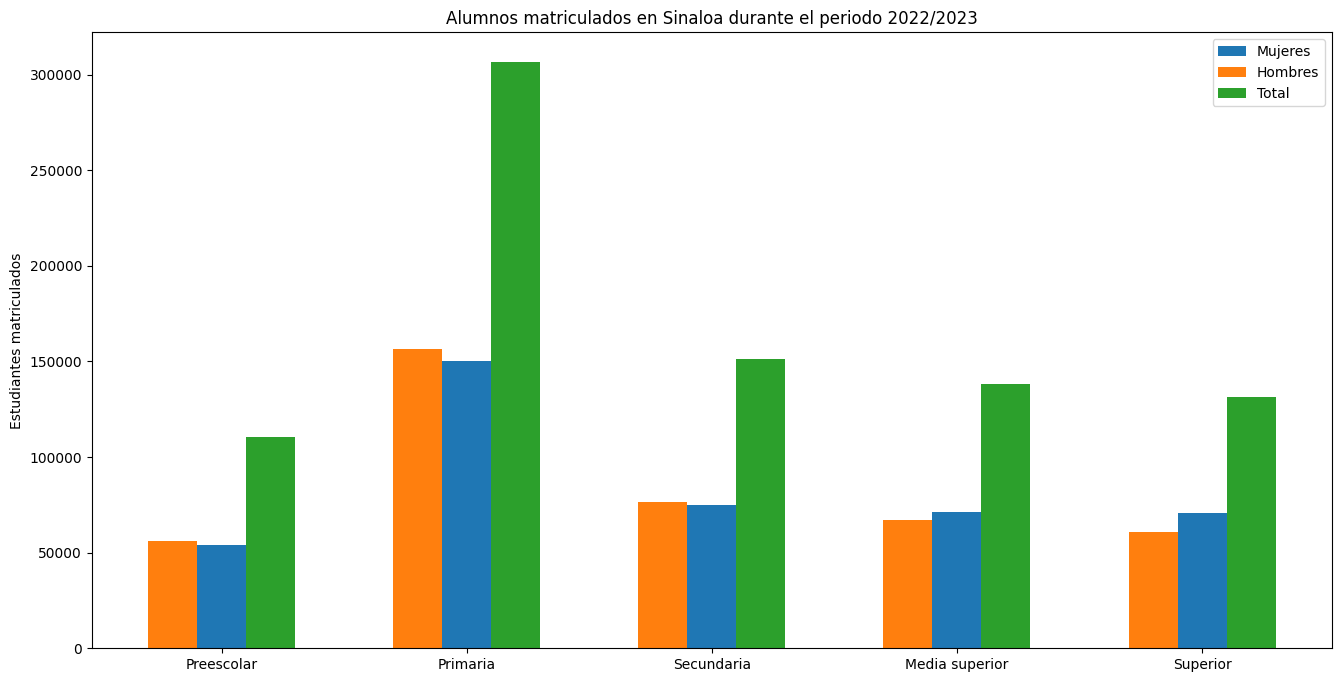

In [22]:
estado = 'Sinaloa'
plot_df_state(estado)

+----+--------------------------+---------+--------------+------------+--------------+------------------+------------+
|    | Entidad                  | Sexo    |   Preescolar |   Primaria |   Secundaria |   Media superior |   Superior |
|----+--------------------------+---------+--------------+------------+--------------+------------------+------------|
|  0 | Estados Unidos Mexicanos | Total   |      4334938 |   13345969 |      6210924 |          5003087 |    4032931 |
|  1 | Estados Unidos Mexicanos | Hombres |      2179034 |    6779902 |      3119827 |          2420910 |    1901523 |
|  2 | Estados Unidos Mexicanos | Mujeres |      2155904 |    6566067 |      3091097 |          2582177 |    2131408 |
+----+--------------------------+---------+--------------+------------+--------------+------------------+------------+


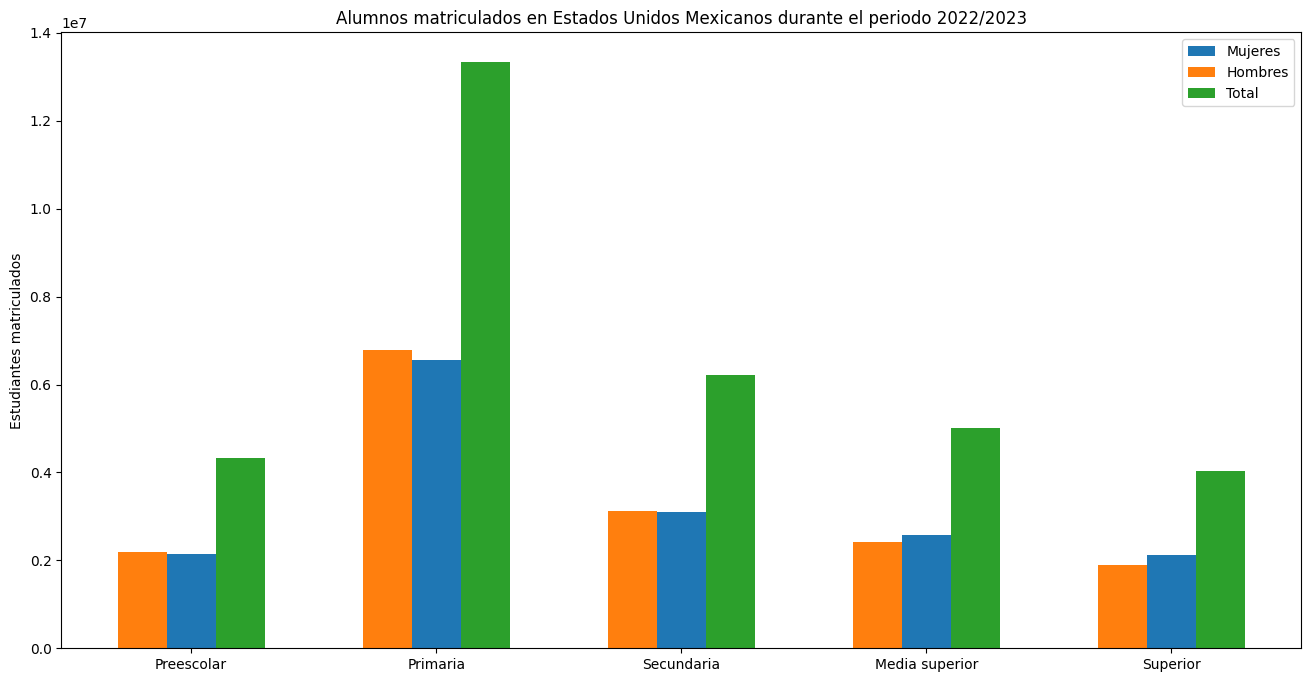

In [24]:
estado = 'Estados Unidos Mexicanos'
plot_df_state(estado)